In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
#
%matplotlib inline

In [30]:
# io
city_data = "resources/city_data.csv"
city_data_df = pd.read_csv(city_data)
ride_data = "resources/ride_data.csv" 
ride_data_df = pd.read_csv(ride_data)
#
city_data_df, ride_data_df

(                city  driver_count   type
 0        Richardfort            38  Urban
 1       Williamsstad            59  Urban
 2        Port Angela            67  Urban
 3         Rodneyfort            34  Urban
 4        West Robert            39  Urban
 ..               ...           ...    ...
 115     Bradshawfurt             7  Rural
 116     New Ryantown             2  Rural
 117   Randallchester             9  Rural
 118      Jessicaport             1  Rural
 119  South Saramouth             7  Rural
 
 [120 rows x 3 columns],
                     city                 date   fare        ride_id
 0     Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873
 1     South Michelleport  2019-03-04 18:24:09  30.24  2343912425577
 2     Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003
 3             Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178
 4             South Jack  2019-03-06 04:28:35  34.58  3908451377344
 ...                  ...                  

In [31]:
# explore data in pandas
city_data_df.count(), ride_data_df.count()

(city            120
 driver_count    120
 type            120
 dtype: int64,
 city       2375
 date       2375
 fare       2375
 ride_id    2375
 dtype: int64)

In [32]:
# are there nulls?
city_data_df.isnull().sum(), ride_data_df.isnull().sum()

(city            0
 driver_count    0
 type            0
 dtype: int64,
 city       0
 date       0
 fare       0
 ride_id    0
 dtype: int64)

In [33]:
# data types in each files
city_data_df.dtypes, ride_data_df.dtypes

(city            object
 driver_count     int64
 type            object
 dtype: object,
 city        object
 date        object
 fare       float64
 ride_id      int64
 dtype: object)

In [34]:
# unique data in city data
print(city_data_df["type"].unique())
print(f"no. of Urban\t{sum(city_data_df['type'] == 'Urban')}")
print(f"no. of Rural\t{sum(city_data_df['type'] == 'Rural')}")
print(f"no. of Suburban\t{sum(city_data_df['type'] == 'Suburban')}")


['Urban' 'Suburban' 'Rural']
no. of Urban	66
no. of Rural	18
no. of Suburban	36


In [190]:
pyber_data_df = pd.merge(city_data_df, ride_data_df, how="left", on=["city", "city"])
pyber_data_df
pyber_data_df.to_csv("resources/pyber_data.csv")

In [38]:
# create the urban city dataframe
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
# print(suburban_cities_df.head(10))
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
print(rural_cities_df.head(10))
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
rural_cities_df.to_csv("resources/rural_cities.csv")
# there is a problem here. me or data, the first city is South Jennifer

                city  driver_count   type                 date   fare  \
2250  South Jennifer             7  Rural  2019-04-01 09:32:45  21.63   
2251  South Jennifer             7  Rural  2019-03-07 19:10:13  48.79   
2252  South Jennifer             7  Rural  2019-04-05 14:35:42  32.20   
2253  South Jennifer             7  Rural  2019-04-02 10:26:50  14.11   
2254  South Jennifer             7  Rural  2019-04-10 20:46:11  43.25   
2255  South Jennifer             7  Rural  2019-01-30 01:40:16  37.05   
2256  South Jennifer             7  Rural  2019-03-11 00:51:24  49.82   
2257    West Heather             4  Rural  2019-03-12 04:22:26  26.55   
2258    West Heather             4  Rural  2019-02-22 09:01:37  17.40   
2259    West Heather             4  Rural  2019-02-22 01:46:43  33.38   

            ride_id  
2250  9135979586871  
2251  9730627367446  
2252   683983658392  
2253  3828267773041  
2254   623928772332  
2255  9545375482385  
2256  1145342227278  
2257  7035849392668 

In [42]:
# number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
print(urban_ride_count.head())
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
print(suburban_ride_count.head())
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
print(rural_ride_count.head())

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64
city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64
city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64


In [43]:
# get average fare for each city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
print(urban_avg_fare.head())
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
print(suburban_avg_fare.head())
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
print(rural_avg_fare.head())

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64
city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64
city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64


In [44]:
# get the average number of city drivers
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
print(urban_driver_count.head())
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
print(suburban_driver_count)
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
print(rural_driver_count)

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64
city
Barronchester         11.0
Bethanyland           22.0
Brandonfort           10.0
Colemanland           23.0
Davidfurt             23.0
East Aaronbury         7.0
East Danielview       22.0
East Kentstad         20.0
East Marymouth         5.0
Grayville              2.0
Josephside            25.0
Lake Ann               3.0
Lake Omar             22.0
Lake Robertside        4.0
Lake Scott            23.0
Lewishaven            23.0
Lewisland              4.0
Mezachester           14.0
Myersshire            19.0
New Olivia            20.0
New Raymond           17.0
New Shannonberg       20.0
Nicolechester         19.0
North Jeffrey         11.0
North Richardhaven     1.0
North Timothy          7.0
Port Shane             7.0
Rodriguezview         20.0
Sotoville             10.0
South Brenda           1.0
South Teresa          21.

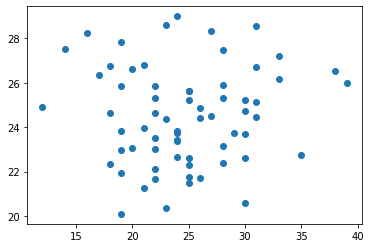

In [45]:
import matplotlib.pyplot as plt
# scatter plot for urban cities
plt.scatter(urban_ride_count, urban_avg_fare)

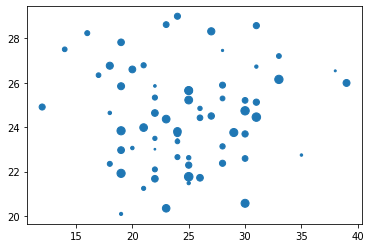

In [46]:
plt.scatter(urban_ride_count, urban_avg_fare, s=urban_driver_count)

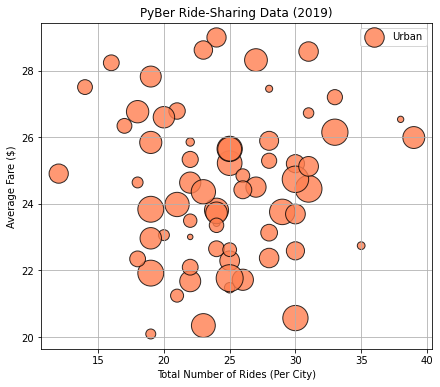

In [47]:
# scatter plot for urban cities
plt.figure(figsize=(7,6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10 * urban_driver_count,
            c="coral",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Urban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

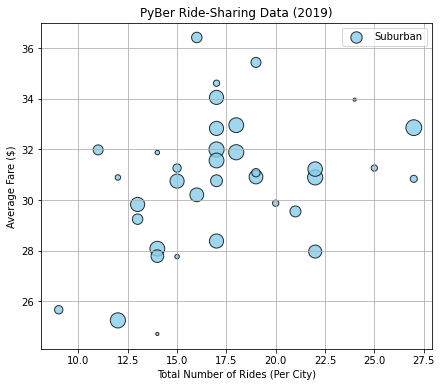

In [48]:
# scatter plot for suburvan cities
plt.figure(figsize=(7,6))
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

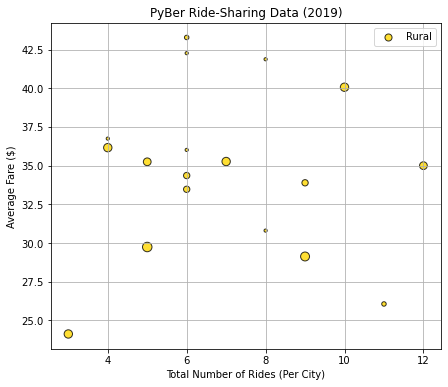

In [49]:
# Build the scatter plots for rural cities.
plt.figure(figsize=(7,6))
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

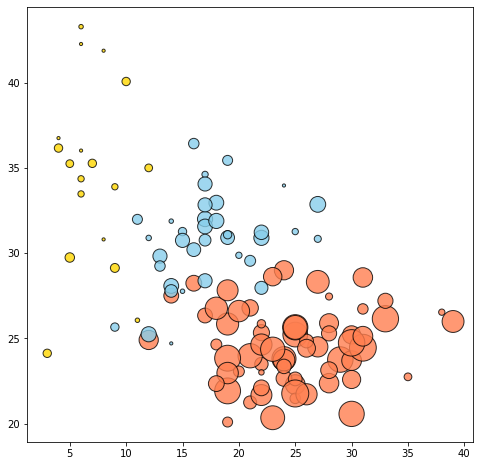

In [50]:
# scatter plot for each type of city
plt.figure(figsize=(8,8))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")


# Show the plot
plt.show()

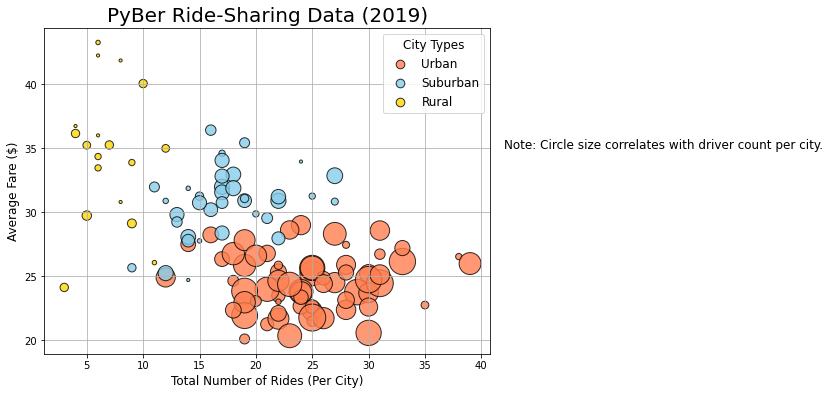

In [51]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(8, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure.
plt.savefig("analysis/Fig1.png")
# Show the plot
plt.show()

In [55]:
# get Summary Statistics for Number of Rides by City Type [5.4.1] with describe() function
print(urban_cities_df.describe())
print(suburban_cities_df.describe())
print(rural_cities_df.describe())

       driver_count         fare       ride_id
count   1625.000000  1625.000000  1.625000e+03
mean      36.678154    24.525772  4.873485e+12
std       20.075545    11.738649  2.907440e+12
min        3.000000     4.050000  1.458810e+10
25%       22.000000    14.550000  2.400244e+12
50%       37.000000    24.640000  4.711188e+12
75%       52.000000    34.580000  7.451579e+12
max       73.000000    44.970000  9.991538e+12
       driver_count        fare       ride_id
count    625.000000  625.000000  6.250000e+02
mean      13.712000   30.970128  4.971015e+12
std        8.042372   10.677508  2.912410e+12
min        1.000000   12.050000  3.218337e+08
25%        5.000000   21.970000  2.364253e+12
50%       16.000000   30.750000  5.053221e+12
75%       21.000000   39.830000  7.551674e+12
max       25.000000   49.960000  9.917744e+12
       driver_count        fare       ride_id
count    125.000000  125.000000  1.250000e+02
mean       4.296000   34.623440  4.647746e+12
std        2.691156   14.

In [63]:
print(f"urban\n{urban_ride_count.describe()}\nrural\n{rural_ride_count.describe()}\nsuburban\n{suburban_ride_count.describe()}")


urban
count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64
rural
count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64
suburban
count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64


In [68]:
# calculate the mean of the ride count for each city type
result =tuple()
result = round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(), 2)
print(result)

(24.62, 17.36, 6.94)


In [75]:
# use median()
result =tuple()
result = round(urban_ride_count.median(), 2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(), 2)
print(f"urban\t{result[0]}\nsuburbs\t{result[1]}\nrural\t{result[2]}")

urban	24.0
suburbs	17.0
rural	6.0


In [88]:
#  mode of the ride count for urban cities
print(f"mode() result by city types:\nurban\n{urban_ride_count.mode()}\n" +
      f"suburban\n{suburban_ride_count.mode()}\n" +
      f"rural\n{rural_ride_count.mode()}")

mode() result by city types:
urban
0    22
1    25
dtype: int64
suburban
0    17
dtype: int64
rural
0    6
dtype: int64


In [97]:
#  NumPy mean() and median() Functions and SciPy mode() Function
import scipy.stats as sts, numpy as np
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")
#
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")
#
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).
The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [117]:
# Summary Statistics for the Fare by City Type [5.4.2] 
# gather data from the fare column
urban_fares = object
urban_fares = urban_cities_df['fare']
urban_fares[0 : 10]
suburban_fares = object
suburban_fares = suburban_cities_df['fare']
suburban_fares[0 : 10]
rural_fares = object
rural_fares = rural_cities_df['fare']
rural_fares[0 : 10]

2250    21.63
2251    48.79
2252    32.20
2253    14.11
2254    43.25
2255    37.05
2256    49.82
2257    26.55
2258    17.40
2259    33.38
Name: fare, dtype: float64

In [118]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.\n")
#
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.\n")
#
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [129]:
# find driver count
urban_drivers = urban_cities_df['driver_count']
print(f"udc\n{urban_drivers.head()}\n")
suburban_drivers = suburban_cities_df["driver_count"]
print(f"sdc\n{suburban_drivers}\n")
rural_drivers = rural_cities_df['driver_count']
print(f"rdc\n{rural_drivers}\n")

udc
0    38
1    38
2    38
3    38
4    38
Name: driver_count, dtype: int64

sdc
1625     7
1626     7
1627     7
1628     7
1629     7
        ..
2245    11
2246    11
2247    11
2248    11
2249    11
Name: driver_count, Length: 625, dtype: int64

rdc
2250    7
2251    7
2252    7
2253    7
2254    7
       ..
2370    1
2371    7
2372    7
2373    7
2374    7
Name: driver_count, Length: 125, dtype: int64



In [133]:
#  NumPy mean() and median() and SciPy mode() all city types drivers
import scipy.stats as sts, numpy as np
mean_urban_driver_count = np.mean(urban_driver_count)
print(f"The mean for the driver counts for urban drivers is {mean_urban_driver_count:.2f}.")

median_urban_driver_count = np.median(urban_driver_count)
print(f"The median for the driver counts for urban drivers is {median_urban_driver_count}.")

mode_urban_driver_count = sts.mode(urban_driver_count)
print(f"The mode for the driver counts for urban drivers is {mode_urban_driver_count}.\n")
#
mean_suburban_driver_count = np.mean(suburban_driver_count)
print(f"The mean for the driver counts for suburban drivers is {mean_suburban_driver_count:.2f}.")

median_suburban_driver_count = np.median(suburban_driver_count)
print(f"The median for the driver counts for suburban drivers is {median_suburban_driver_count}.")

mode_suburban_driver_count = sts.mode(suburban_driver_count)
print(f"The mode for the driver counts for suburban drivers is {mode_suburban_driver_count}.\n")
#
mean_rural_driver_count = np.mean(rural_driver_count)
print(f"The mean for the driver counts for rural drivers is {mean_rural_driver_count:.2f}.")

median_rural_driver_count = np.median(rural_driver_count)
print(f"The median for the driver counts for rural drivers is {median_rural_driver_count}.")

mode_rural_driver_count = sts.mode(urban_driver_count)
print(f"The mode for the driver counts for rural drivers is {mode_rural_driver_count}.")

The mean for the driver counts for urban drivers is 36.68.
The median for the driver counts for urban drivers is 37.0.
The mode for the driver counts for urban drivers is ModeResult(mode=array([39], dtype=int64), count=array([86])).

The mean for the driver counts for suburban drivers is 13.71.
The median for the driver counts for suburban drivers is 16.0.
The mode for the driver counts for suburban drivers is ModeResult(mode=array([20], dtype=int64), count=array([79])).

The mean for the driver counts for rural drivers is 4.30.
The median for the driver counts for rural drivers is 4.0.
The mode for the driver counts for rural drivers is ModeResult(mode=array([39], dtype=int64), count=array([86])).


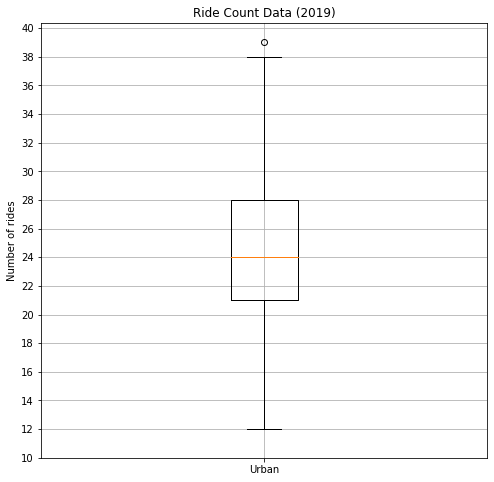

In [150]:
# Create Box-and-Whisker Plots [5.4.4]
fig, ax = plt.subplots(figsize=(8, 8))
x_labels = ["Urban"]
# decorate graph
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of rides")

ax.grid()
# specify plot type
ax.boxplot(urban_ride_count, labels=x_labels)
# set ticks on the y axis
ax.set_yticks(np.arange(10, 41, step=2.0))
# show grid
plt.show()

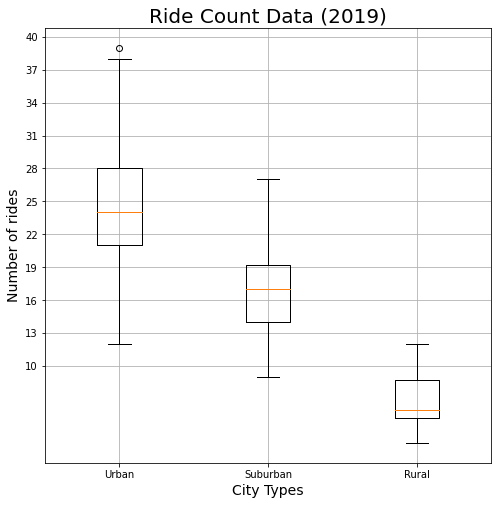

In [155]:
# Create Box-and-Whisker Plots [5.4.4]
fig, ax = plt.subplots(figsize=(8, 8))
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
# decorate graph
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_xlabel("City Types", fontsize=14)
ax.set_ylabel("Number of rides", fontsize=14)

ax.grid()
# specify plot type
ax.boxplot(ride_count_data, labels=x_labels)
# set ticks on the y axis
ax.set_yticks(np.arange(10, 41, step=3.0))
# show grid
plt.savefig("analysis/Fig2.png")
plt.show()

In [166]:
# Get the city that matches 39.
print(sum(urban_ride_count==39))
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(urban_city_outlier)
print(f"{urban_city_outlier} has the highest rider count.")

1
West Angela
West Angela has the highest rider count.


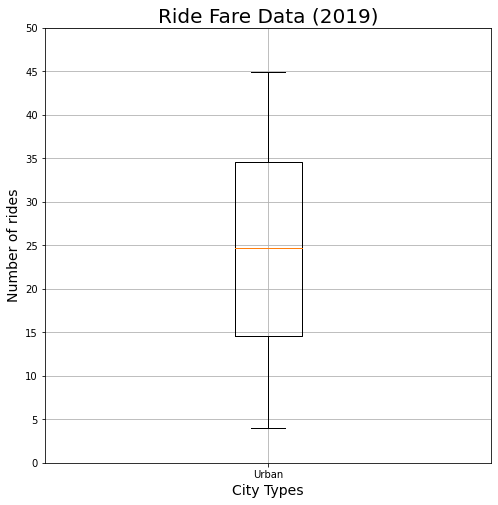

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [169]:
# Create Box-and-Whisker Plot for the urban ride fare data [5.4.4]
fig, ax = plt.subplots(figsize=(8, 8))
x_labels = ["Urban"]
ride_fare_data = [urban_fares]
# print(ride_fare_data)
# decorate graph
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_xlabel("City Types", fontsize=14)
ax.set_ylabel("Number of rides", fontsize=14)

ax.grid()
# specify plot type
ax.boxplot(ride_fare_data, labels=x_labels)
# set ticks on the y axis
ax.set_yticks(np.arange(0, 51, step=5.0))
# show grid

plt.show()
#
print("Summary Statistics")
urban_fares.describe()

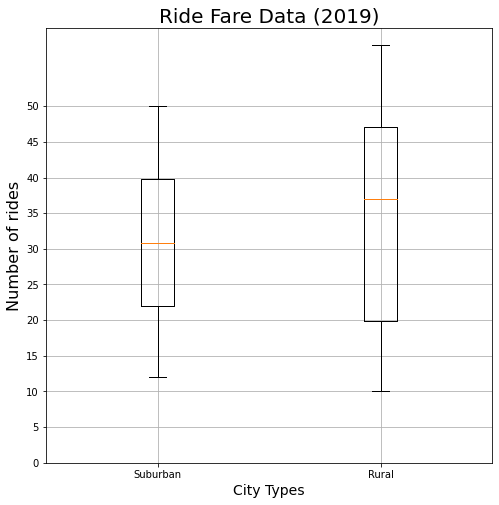

Summary Statistics

count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64
count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64


In [194]:
# Create Box-and-Whisker Plot for the suburban ride fare data [5.4.4]
fig, ax = plt.subplots(figsize=(8, 8))
x_labels = ["Suburban", "Rural"]
ride_fare_data = [suburban_fares, rural_fares]
# print(ride_fare_data)
# decorate graph
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_xlabel("City Types", fontsize=14)
ax.set_ylabel("Number of rides", fontsize=16)

ax.grid()
# specify plot type
ax.boxplot(ride_fare_data, labels=x_labels)
# set ticks on the y axis
ax.set_yticks(np.arange(0, 51, step=5.0))
# show grid

plt.show()
#
print("Summary Statistics")
print(f"\n{suburban_fares.describe()}\n" + f"{rural_fares.describe()}")

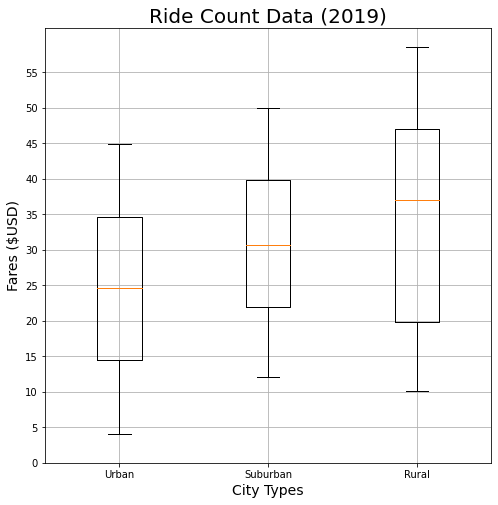

In [187]:
# Create Box-and-Whisker Plots for all three city types [skill  drill (3)]
fig, ax = plt.subplots(figsize=(8, 8))
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_fares, suburban_fares, rural_fares]
# decorate graph
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_xlabel("City Types", fontsize=14)
ax.set_ylabel("Fares ($USD)", fontsize=14)

ax.grid()
# specify plot type
ax.boxplot(ride_count_data, labels=x_labels)
# set ticks on the y axis
ax.set_yticks(np.arange(0, 60, step=5.0))
# show grid
plt.savefig("analysis/Fig3.png")
plt.show()

In [189]:
# From the combined box-and-whisker plots, we see that there are no outliers. 
# However, the average fare for rides in the rural cities is about $11 and $5 more per ride 
# than the urban and suburban cities, respectively.
# Why do you think there is such a big difference? 
# By looking at the number of riders for each city, can you get a sense of the overall revenue?
#
# first look indicates that after a 12:00 the fare increases signigicantly. The further one drives
# between 12 and 23:59 the highest the fares. It remains to be demonstrated on a chart the relationship
# between the time of the rides and the destination.
# TBD

Object `revenue` not found.


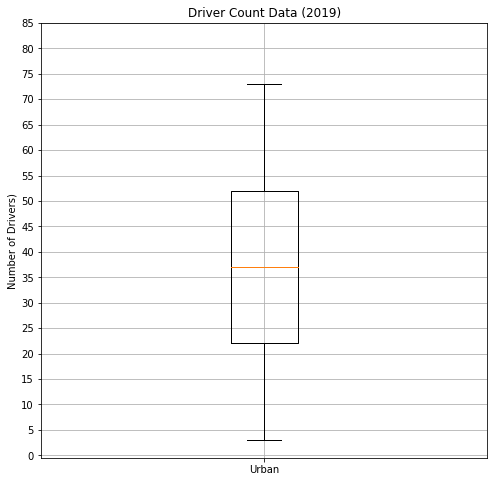

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [193]:
# plot driver count data
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots(figsize=(8, 8))
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

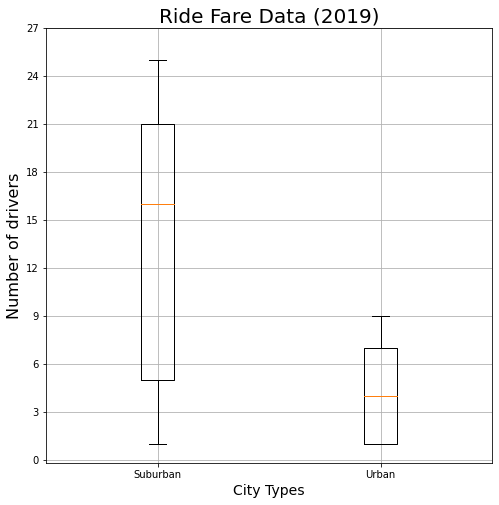

Summary Statistics

count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64
count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64


In [196]:
# Create Box-and-Whisker Plot for the suburban and rural drivers [5.4.4]
#  [skill  drill (4)]
fig, ax = plt.subplots(figsize=(8, 8))
x_labels = ["Suburban", "Urban"]
ride_fare_data = [suburban_drivers, rural_drivers]
# print(ride_fare_data)
# decorate graph
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_xlabel("City Types", fontsize=14)
ax.set_ylabel("Number of drivers", fontsize=16)

ax.grid()
# specify plot type
ax.boxplot(ride_fare_data, labels=x_labels)
# set ticks on the y axis
ax.set_yticks(np.arange(0, 30, step=3.0))
# show grid

plt.show()
#
print("Summary Statistics")
print(f"\n{suburban_fares.describe()}\n" + f"{rural_fares.describe()}")

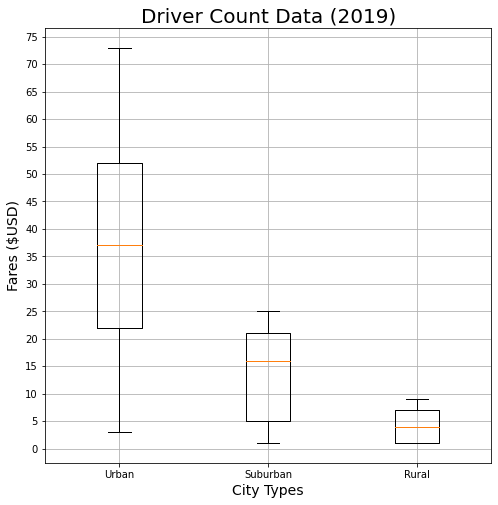

In [198]:
# Create Box-and-Whisker Plots for all three city types [skill  drill (3)]
fig, ax = plt.subplots(figsize=(8, 8))
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_driver_count, suburban_driver_count, rural_driver_count]
# decorate graph
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_xlabel("City Types", fontsize=14)
ax.set_ylabel("Fares ($USD)", fontsize=14)

ax.grid()
# specify plot type
ax.boxplot(ride_count_data, labels=x_labels)
# set ticks on the y axis
ax.set_yticks(np.arange(0, 77, step=5.0))
# show grid
plt.savefig("analysis/Fig4.png")
plt.show()

In [199]:
# The average number of drivers in rural cities is nine to four times less per city 
# than in urban and suburban cities, respectively. By looking at the driver count data 
# and fare data, can you get a sense of the overall revenue?

In [242]:
# get the percentage of fares for each city type [5.5.1]
# To create this pie chart, we will need to do the following:
    # Get the total fares for each city type.
    # Get the total for all the fares for all the city types.
    # Calculate the percentage of the total fares for each city type.
# sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
# print(f"sum fares by type\t{sum_fares_by_type}")
# total_fares = pyber_data_df['fare'].sum()
# print(f"total fares\t{total_fares}")
# # percentage of fare for each city type
# type_percents = round(sum_fares_by_type/total_fares * 100, 2)

type_percents = 100*pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

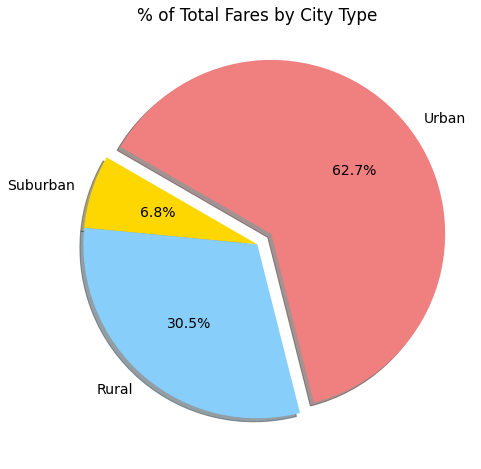

In [252]:
# create pie chart for the percentage of fares by city type
# To create a pie chart with the plt.pie() function, we need an array that contains the values
# and labels we are plotting.

pie_bouf = [0, 0, 0.1]
pie_tint = ["gold", "lightskyblue", "lightcoral"]
#
plt.subplots(figsize=(8, 8))
plt.pie(
    type_percents,
    labels=["Suburban", "Rural", "Urban"],
    explode=pie_bouf,
    colors=pie_tint,
    shadow=True,
    startangle=150, autopct='%.1f%%'
)
# title
import matplotlib as mpl
plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14
#
# figure to file
plt.savefig("analysis/Fig5.png")
plt.show()

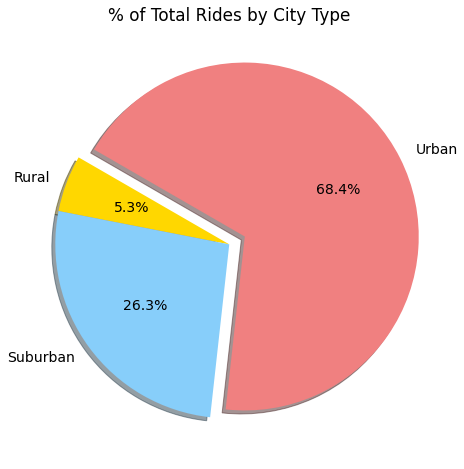

In [268]:
# calculate ride percentage
# To create this pie chart, we need to do the following:

# Get the total number of rides for each city type.
# Get the total rides for all the city types.
# Calculate the percentage of the total rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(
    ['type']).count()['ride_id'] / pyber_data_df['ride_id'].count()

plt.subplots(figsize=(8, 8))
pie_bouf = [0, 0, 0.1]
pie_tint = ["gold", "lightskyblue", "lightcoral"]
#
plt.pie(ride_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=pie_tint,
        explode=pie_bouf,
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

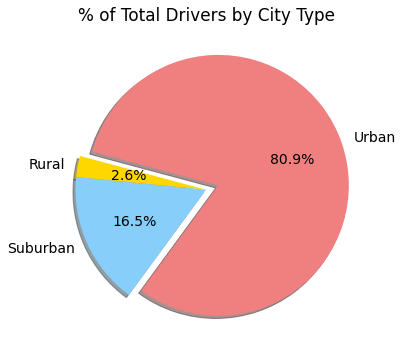

In [281]:
# calculate driver percentage [5.7.1]
city_data_df
driver_percents = city_data_df.groupby(['type']).sum()['driver_count']/city_data_df['driver_count'].sum() * 100
#
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()